In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# 一、matplotlib的绘图样式（style）

## 1.matplotlib预先定义样式

In [3]:
# matplotlib 内置样式
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


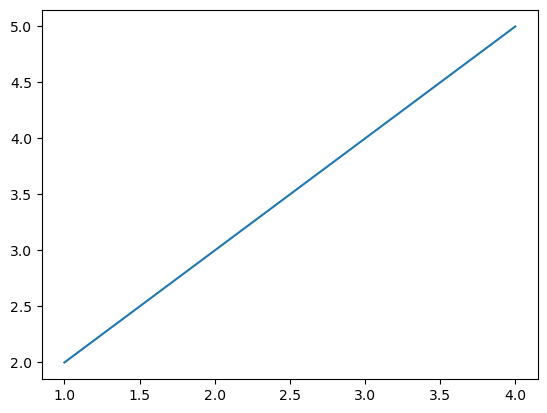

In [4]:
# 使用内置样式default
plt.style.use('default')
plt.plot([1,2,3,4],[2,3,4,5])

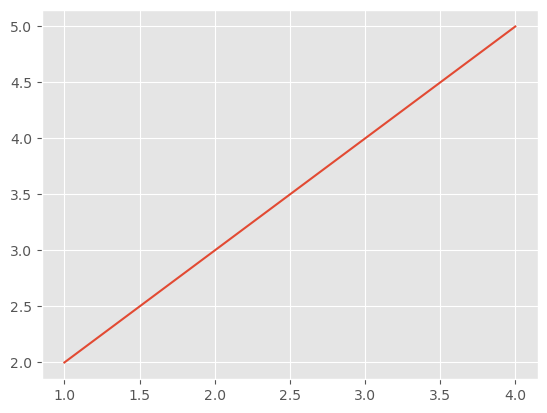

In [5]:
# 使用内置样式ggplot
plt.style.use('ggplot')
plt.plot([1,2,3,4],[2,3,4,5])

## 2. 用户自定义stylesheet

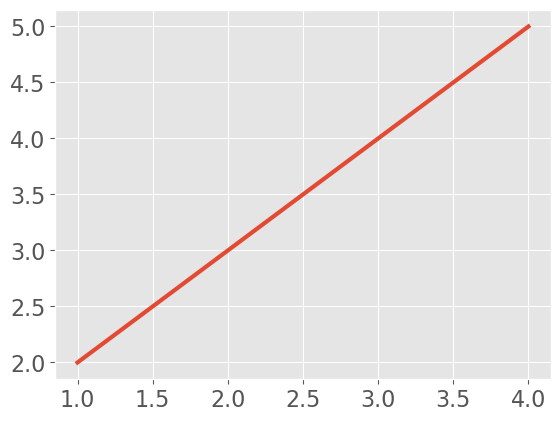

In [6]:
# 在任意路径下创建一个后缀名为mplstyle的样式清单，编辑文件添加以下样式内容
plt.style.use('presentation.mplstyle')
plt.plot([1,2,3,4],[2,3,4,5])

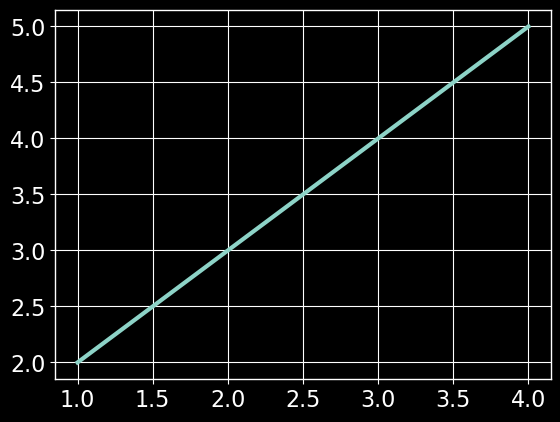

In [8]:
# 值得特别注意的是，matplotlib支持混合样式的引用，只需在引用时输入一个样式列表，若是几个样式中涉及到同一个参数，右边的样式表会覆盖左边的值。
plt.style.use(['dark_background', 'presentation.mplstyle'])
plt.plot([1,2,3,4],[2,3,4,5])

## 3. 设置rcparams
我们还可以通过修改默认rc设置的方式改变样式，所有rc设置都保存在一个叫做 matplotlib.rcParams的变量中。

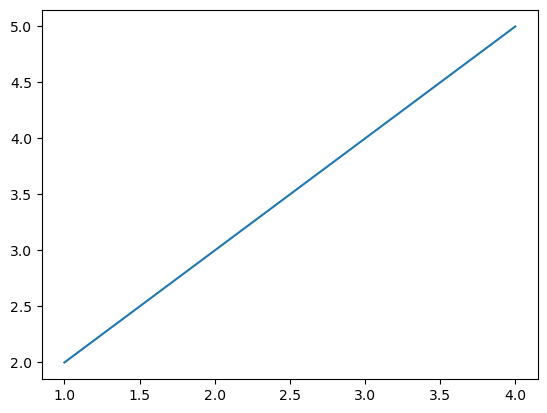

In [9]:
plt.style.use('default') # 恢复到默认样式
plt.plot([1,2,3,4],[2,3,4,5])

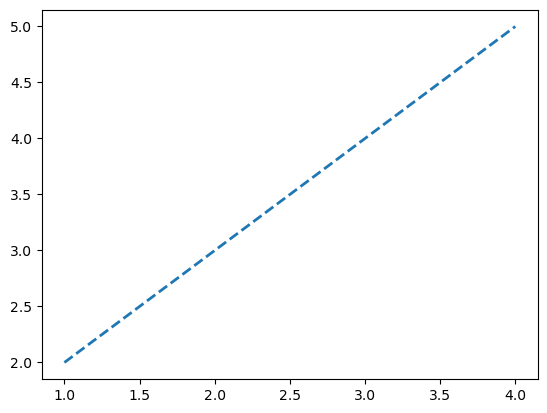

In [10]:
# 一次修改一个样式
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linestyle'] = '--'
plt.plot([1,2,3,4],[2,3,4,5])

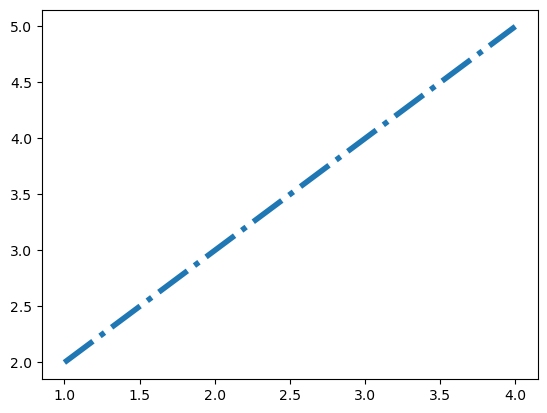

In [11]:
# 一次性修改多个样式
mpl.rc('lines', linewidth=4, linestyle='-.')
plt.plot([1,2,3,4],[2,3,4,5])

## 4.修改matplotlibrc文件
找到路径后，就可以直接编辑样式文件了，打开后看到的文件格式大致是这样的，文件中列举了所有的样式参数，找到想要修改的参数，比如lines.linewidth: 8，并将前面的注释符号去掉，此时再绘图发现样式以及生效了。由于matplotlib是使用matplotlibrc文件来控制样式的，也就是上一节提到的rc setting，所以我们还可以通过修改matplotlibrc文件的方式改变样式。

In [12]:
# 查找matplotlibrc文件的路径
mpl.matplotlib_fname()

'D:\\Anaconda\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

# 二、matplotlib的色彩设置（color）-https://vis.baidu.com/
从可视化编码的角度对颜色进行分析，可以将颜色分为色相、亮度和饱和度三个视觉通道。通常来说：
色相： 没有明显的顺序性、一般不用来表达数据量的高低，而是用来表达数据列的类别。
明度和饱和度： 在视觉上很容易区分出优先级的高低、被用作表达顺序或者表达数据量视觉通道。

## 1. RGB或RGBA

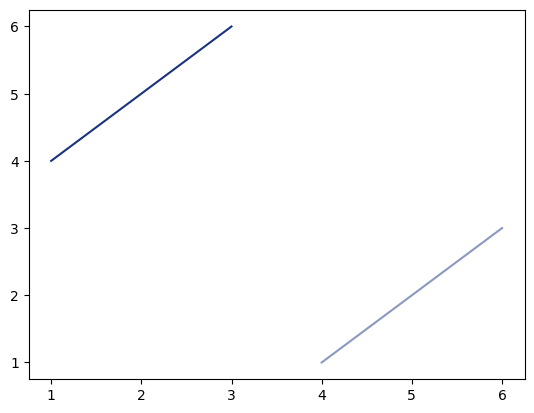

In [14]:
plt.style.use('default')
# 颜色用[0,1]之间的浮点数表示，四个分量按顺序分别为(red, green, blue, alpha)，其中alpha透明度可省略
plt.plot([1,2,3],[4,5,6],color=(0.1, 0.2, 0.5))
plt.plot([4,5,6],[1,2,3],color=(0.1, 0.2, 0.5, 0.5))

## 2. HEX RGB 或 RGBA

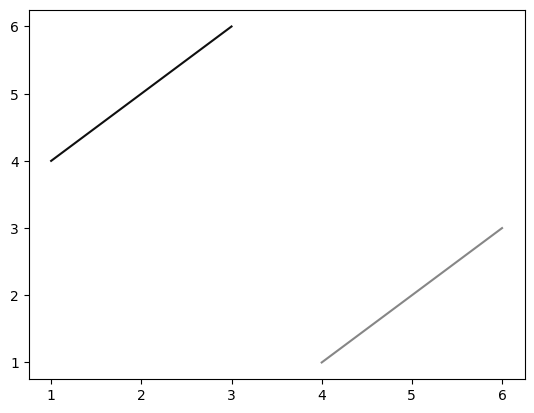

In [15]:
# 用十六进制颜色码表示，同样最后两位表示透明度，可省略
plt.plot([1,2,3],[4,5,6],color='#0f0f0f')
plt.plot([4,5,6],[1,2,3],color='#0f0f0f80')

## 3.灰度色阶

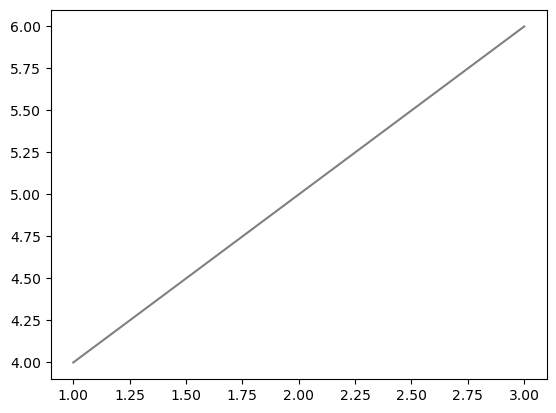

In [16]:
# 当只有一个位于[0,1]的值时，表示灰度色阶
plt.plot([1,2,3],[4,5,6],color='0.5')

## 4.单字符基本颜色

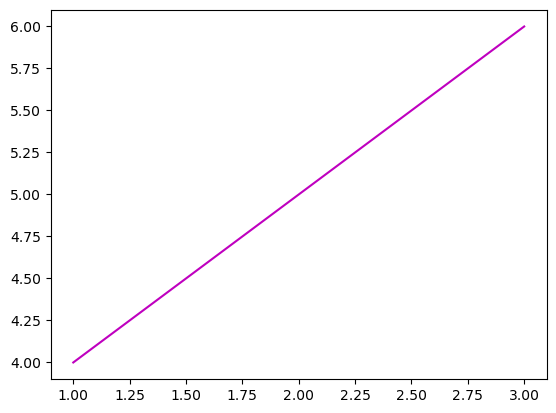

In [17]:
# matplotlib有八个基本颜色，可以用单字符串来表示，分别是'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'，对应的是blue, green, red, cyan, magenta, yellow, black, and white的英文缩写
plt.plot([1,2,3],[4,5,6],color='m')

## 5. 颜色名称
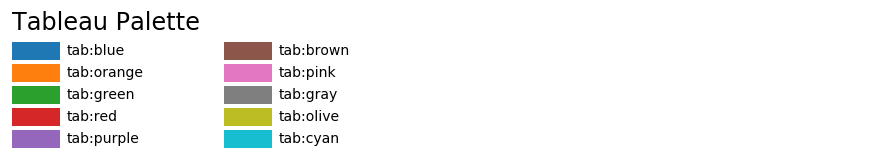
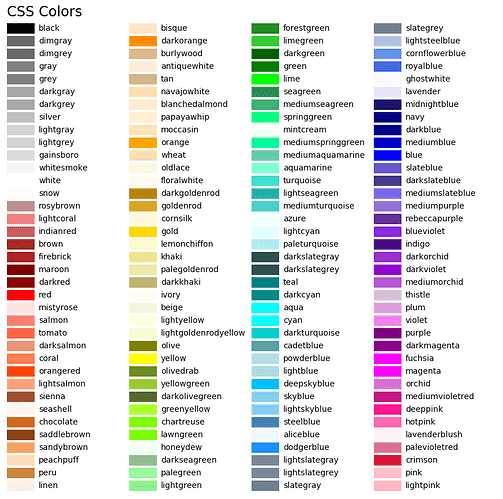

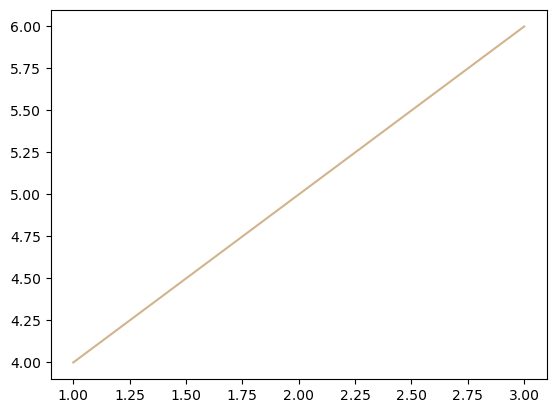

In [18]:
# matplotlib提供了颜色对照表，可供查询颜色对应的名称
plt.plot([1,2,3],[4,5,6],color='tan')

## 6. 使用colormap设置一组颜色-https://matplotlib.org/tutorials/colors/colormaps.html
有些图表支持使用colormap的方式配置一组颜色，从而在可视化中通过色彩的变化表达更多信息。

在matplotlib中，colormap共有五种类型:

- 顺序（Sequential）。通常使用单一色调，逐渐改变亮度和颜色渐渐增加，用于表示有顺序的信息
- 发散（Diverging）。改变两种不同颜色的亮度和饱和度，这些颜色在中间以不饱和的颜色相遇；当绘制的信息具有关键中间值（例如地形）或数据偏离零时，应使用此值。
- 循环（Cyclic）。改变两种不同颜色的亮度，在中间和开始/结束时以不饱和的颜色相遇。用于在端点处环绕的值，例如相角，风向或一天中的时间。
- 定性（Qualitative）。常是杂色，用来表示没有排序或关系的信息。
- 杂色（Miscellaneous）。一些在特定场景使用的杂色组合，如彩虹，海洋，地形等。

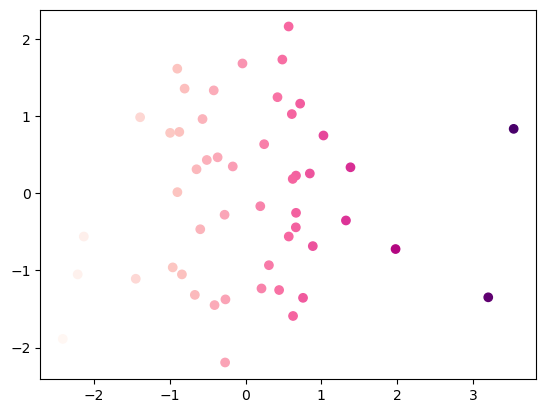

In [19]:
x = np.random.randn(50)
y = np.random.randn(50)
plt.scatter(x,y,c=x,cmap='RdPu')

In [21]:
from matplotlib import cm
from colorspacious import cspace_converter
from collections import OrderedDict

cmaps = OrderedDict()

### 6.1 Sequential

In [22]:
cmaps['Perceptually Uniform Sequential'] = [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']

cmaps['Sequential'] = [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

### 6.2 Sequential2

In [23]:
cmaps['Sequential (2)'] = [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']

### 6.3 Diverging

In [24]:
cmaps['Diverging'] = [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']

### 6.4 Cyclic

In [25]:
cmaps['Cyclic'] = ['twilight', 'twilight_shifted', 'hsv']

### 6.5 Qualitative

In [26]:
cmaps['Qualitative'] = ['Pastel1', 'Pastel2', 'Paired', 'Accent',
                        'Dark2', 'Set1', 'Set2', 'Set3',
                        'tab10', 'tab20', 'tab20b', 'tab20c']

### 6.6 Miscellaneous

In [27]:
cmaps['Miscellaneous'] = [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
            'gist_rainbow', 'rainbow', 'jet', 'turbo', 'nipy_spectral',
            'gist_ncar']

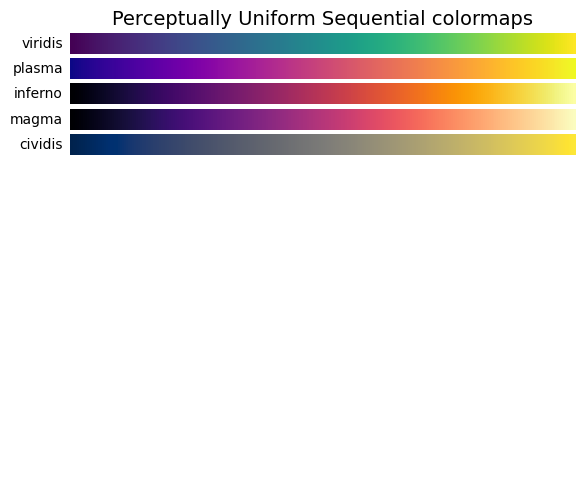

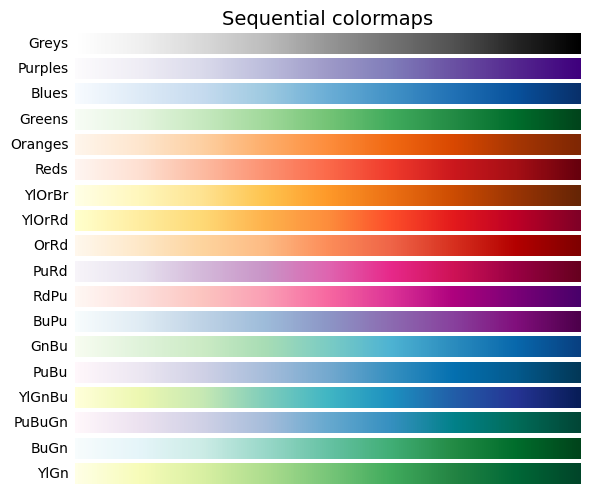

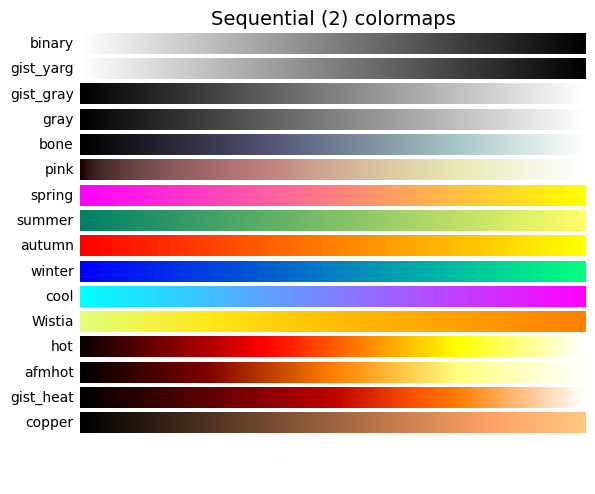

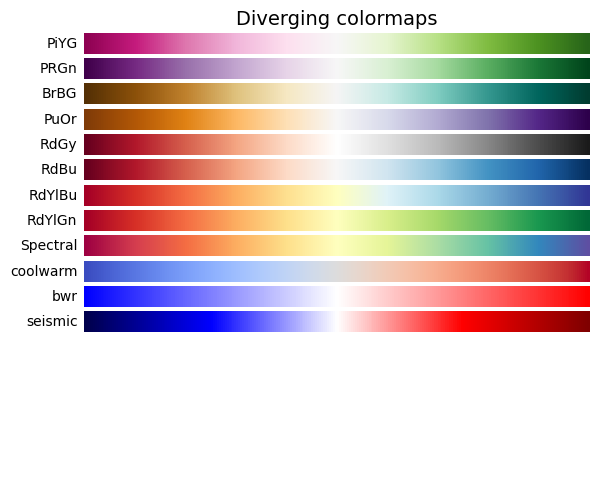

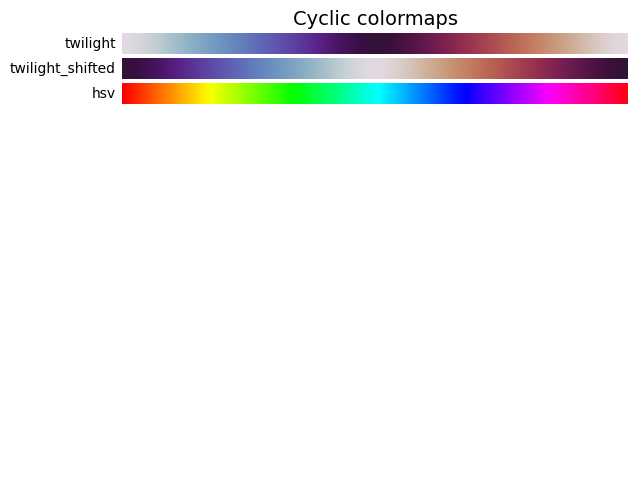

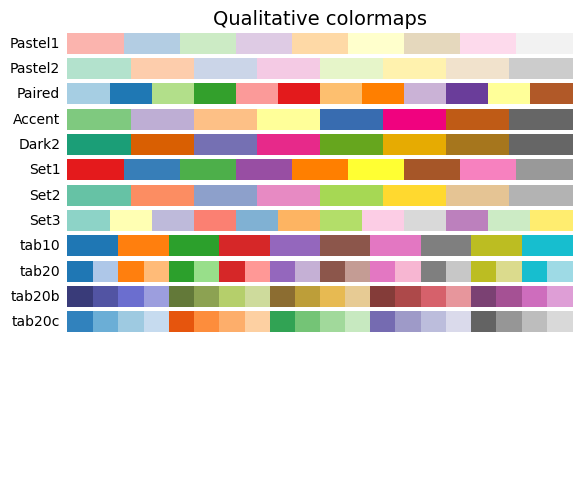

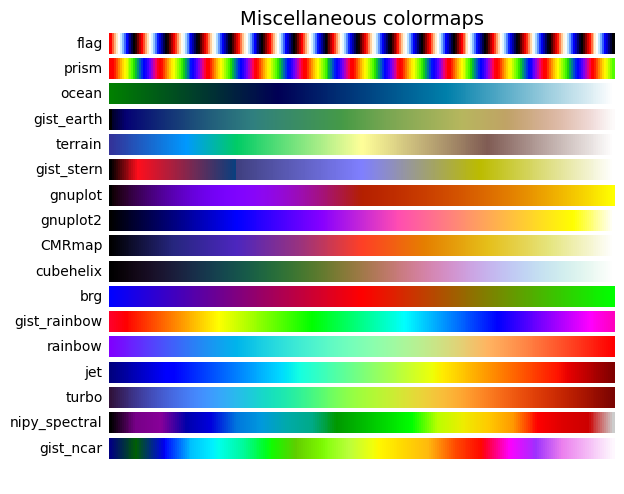

In [28]:
nrows = max(len(cmap_list) for cmap_category, cmap_list in cmaps.items())
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(cmap_category, cmap_list, nrows):
    fig, axes = plt.subplots(nrows=nrows)
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
    axes[0].set_title(cmap_category + ' colormaps', fontsize=14)

    for ax, name in zip(axes, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes:
        ax.set_axis_off()


for cmap_category, cmap_list in cmaps.items():
    plot_color_gradients(cmap_category, cmap_list, nrows)

plt.show()